In [ ]:
import pandas as pd
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\test.csv
data\testdata.manual.2009.06.14.csv
data\train.csv
data\training.1600000.processed.noemoticon.csv


In [2]:
df = pd.read_csv('data\\train.csv',encoding='latin1')
test_data = pd.read_csv('data\\test.csv',encoding='latin1')

In [3]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:

def strip_string(text):
    text = re.sub(r'[^\w\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF*]', '', str(text)) # removes anything but letters numbers and emojis
    text = re.sub(r'\s+', ' ', str(text)).strip() # strips unnecessary spaces
    return text
df['clean_text'] = df['text'].apply(strip_string)

corpus = df['clean_text'].tolist()
print(len(corpus))
print(corpus[0])


27481
Id have responded if I were going


In [6]:
# drop cols

df = df[['sentiment', 'clean_text']]
df.dropna(inplace=True)

df.head()

,sentiment,clean_text
0,neutral,Id have responded if I were going
1,negative,Sooo SAD I will miss you here in San Diego
2,negative,my boss is bullying me
3,negative,what interview leave me alone
4,negative,Sons of **** why couldnt they put them on the ...


In [7]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['clean_text'] = df['clean_text'].apply(tokenize_text)

df.head()



,sentiment,clean_text
0,neutral,"[Id, have, responded, if, I, were, going]"
1,negative,"[Sooo, SAD, I, will, miss, you, here, in, San,..."
2,negative,"[my, boss, is, bullying, me]"
3,negative,"[what, interview, leave, me, alone]"
4,negative,"[Sons, of, *, *, *, *, why, couldnt, they, put..."


In [8]:
# Function to remove stopwords
def remove_stopwords(text): 
    stop_words = set(stopwords.words('english'))  # Load stopwords set
    filtered_words = [word for word in text if word.lower() not in stop_words]  # Remove stopwords
    return filtered_words

# Apply function to clean_text column
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# Display first few rows
df.head()

,sentiment,clean_text
0,neutral,"[Id, responded, going]"
1,negative,"[Sooo, SAD, miss, San, Diego]"
2,negative,"[boss, bullying]"
3,negative,"[interview, leave, alone]"
4,negative,"[Sons, *, *, *, *, couldnt, put, releases, alr..."


In [9]:
def lemmatize_text(text): 
    wnl = WordNetLemmatizer()
    lemmatized_tokens = [wnl.lemmatize(word) for word in text]  # Lemmatize each word
    return lemmatized_tokens

# Example Usage
text = "The cats are running faster than the dogs."
lemmatized_text = lemmatize_text(word_tokenize(text))
print(lemmatized_text)

['The', 'cat', 'are', 'running', 'faster', 'than', 'the', 'dog', '.']


In [10]:

print(df["sentiment"].value_counts())

min_count = min(df['sentiment'].value_counts())

df = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=42))
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df["sentiment"].value_counts())

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64
neutral     7781
positive    7781
negative    7781
Name: sentiment, dtype: int64


In [11]:
X = df['clean_text']
X = X.dropna()

print(df["sentiment"])
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

y.head()

0         neutral
1         neutral
2        positive
3        positive
4         neutral
           ...   
23338     neutral
23339    positive
23340    negative
23341    negative
23342    positive
Name: sentiment, Length: 23343, dtype: object


0     neutral
1     neutral
2    positive
3    positive
4     neutral
Name: sentiment, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert list of words into a string for each row
X_train = [' '.join(text) for text in X_train]
X_test = [' '.join(text) for text in X_test]

# Initialize TF-IDF Vectorizer
vectorization = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_vector_train = vectorization.fit_transform(X_train)
X_vector_test = vectorization.transform(X_test)

# Check the shape of the resulting matrix (just to confirm it's working)
print(X_vector_train)

  (0, 5739)	0.1624638666905845
  (0, 21314)	0.3343388334167571
  (0, 8432)	0.41110919241197014
  (0, 3431)	0.362152554926549
  (0, 10836)	0.1460513592532447
  (0, 15441)	0.3076183659433527
  (0, 13035)	0.41110919241197014
  (0, 12513)	0.3592765730940431
  (0, 14135)	0.21707884539557945
  (0, 12369)	0.18070078247498206
  (0, 12608)	0.26044445625404994
  (1, 13828)	0.8983714467186749
  (1, 2635)	0.43923654643095805
  (2, 14330)	0.34601440294681735
  (2, 14284)	0.1660225325903816
  (2, 14054)	0.3604240198890241
  (2, 17605)	0.3159027179707726
  (2, 4046)	0.2804165129683611
  (2, 2941)	0.18926209060726237
  (2, 4950)	0.3069713831378589
  (2, 21640)	0.2587057277817828
  (2, 14251)	0.18295091641055902
  (2, 18923)	0.34601440294681735
  (2, 13095)	0.2843693038843786
  (2, 4103)	0.15203943280339394
  :	:
  (18671, 8321)	0.43201464222244335
  (18671, 9143)	0.3103590302055042
  (18671, 9650)	0.25163736171136664
  (18671, 9134)	0.22375072431826729
  (18671, 21668)	0.32497011998137265
  (18671, 83

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_vector_train, y_train)



RandomForestClassifier(random_state=0)

0.7031484257871065
              precision    recall  f1-score   support

    negative       0.73      0.67      0.70      1575
     neutral       0.60      0.67      0.64      1501
    positive       0.79      0.76      0.78      1593

    accuracy                           0.70      4669
   macro avg       0.71      0.70      0.70      4669
weighted avg       0.71      0.70      0.70      4669



<AxesSubplot:>

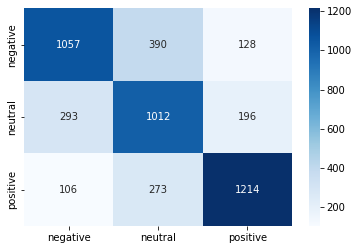

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_rfc = rfc.predict(X_vector_test)
score_rfc = accuracy_score(y_rfc, y_test)
print(score_rfc)

print(classification_report(y_test, y_rfc))

cm =confusion_matrix(y_test, y_rfc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)

In [19]:
def wp(text):
    return text.upper()
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test
text = '''I am sad today for saom reason'''
rfc.predict(manual_testing(text))

array(['negative'], dtype=object)